In [547]:
from astropy.table import Table, vstack, setdiff, unique
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
from scipy.stats import gaussian_kde
import seaborn as sns
from scipy import stats
import pandas as pd
import glob

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [201]:
def median(x,y,group_size=500):
    array = np.transpose(np.vstack([x,y]))
    array=array[array[:,0].argsort()]
    index = 0

    x_list = np.array([])
    y_median_list = np.array([])
    while index < len(cat) - group_size:
        array_slice =array[index: index + group_size - 1]
        x_median = np.median(array_slice[:,0])
        y_median = np.median(array_slice[:,1])
        index = index + group_size
    
        x_list = np.append(x_list,x_median)
        y_median_list = np.append(y_median_list,y_median)

    array_slice = array[index: -1]
    x_median = np.median(array_slice[:,0])
    y_median = np.median(array_slice[:,1] )

    x_list = np.append(x_list,x_median)
    y_median_list = np.append(y_median_list,y_median)
    
    return x_list,y_median_list

### COSMOS2015 matched table

In [251]:
cat = Table.read('CUT_deep_catalogs/COSMOS2015_CLAUDS_matched.fits')
# '_1' --old parameters
# '_2' --new parameters
# '' --COSMOS parameters

/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[-0.007  0.019  0.003 -0.002 -0.024 -0.036 -0.052 -0.041 -0.066 -0.071
 -0.086 -0.084 -0.089 -0.088 -0.148    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan]


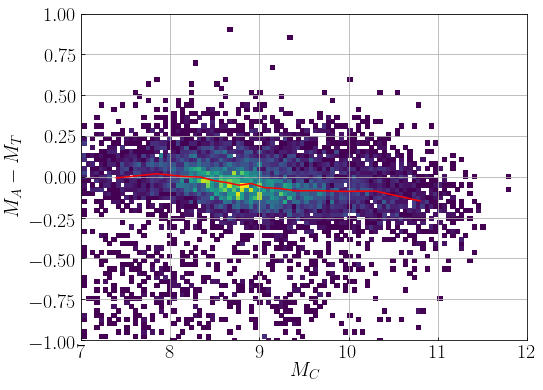

In [249]:
# cat_cut = cat[np.logical_and(cat['CLASS_2']<10,abs(cat['zKDEPeak_1']-cat['Z_BEST_BC03'])<0.05*cat['Z_BEST_BC03'])] 
cat_cut = cat[np.logical_and(cat['CLASS_2']<10,abs(cat['Z_BEST_BC03']-0.8)<0.1)]
# cat_cut = cat[np.logical_and(cat['preds_median_1']<0.89,abs(cat['zKDEPeak_1']-0.4)<0.1)]
# cat_cut = cat_cut[cat_cut['sfProb_1']<0.5]

fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))
x = np.array(cat_cut['MASS_MED'])
y = np.array(cat_cut['MASS_MED_1']-cat_cut['MASS_MED_2'])

y = y[np.logical_and(x>7,x<12)]
x = x[np.logical_and(x>7,x<12)]

x = x[np.logical_and(y>-3,y<3)]
y = y[np.logical_and(y>-3,y<3)]
x_list,y_median = median(x,y)

# # plot
plt.hist2d(x,y,bins=[100,100],cmin=0.1)
plt.plot(x_list,y_median,'r')

plt.xlim([7,12])
plt.ylim([-1,1])
plt.xlabel(r'$M_C$', fontsize=20)
plt.ylabel(r'$M_A-M_T$', fontsize=20)
plt.grid()
# plt.show(); plt.close()
print(y_median)


### matched table in ELAIS

In [206]:
cat = Table.read('CUT_deep_catalogs/s16a_DEEP_deep_masterCat_newz2.fits')

/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


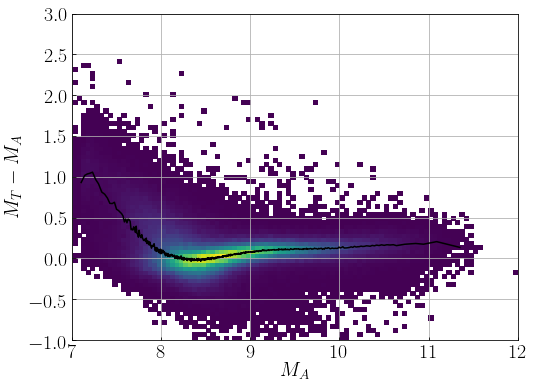

In [208]:
# cat_cut = cat[np.logical_and(cat['CLASS']<10,abs(cat['zKDEPeak_old']-cat['Z_BEST_BC03'])<0.05*cat['Z_BEST_BC03'])] 
cat_cut = cat[np.logical_and(cat['CLASS']<10,abs(cat['Z_BEST_BC03']-0.6)<0.3)] 
cat_cut = cat_cut[cat_cut['sfProb']>0.5]

fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))
x = np.array(cat_cut['MASS_MED_old'])
y = np.array(cat_cut['MASS_MED']-cat_cut['MASS_MED_old'])

y = y[np.logical_and(x>7,x<12)]
x = x[np.logical_and(x>7,x<12)]

x = x[np.logical_and(y>-3,y<3)]
y = y[np.logical_and(y>-3,y<3)]
x_list,y_median = median(x,y)

# # plot
plt.hist2d(x,y,bins=[100,100],cmin=0.1)
plt.plot(x_list,y_median,'k')

plt.xlim([7,12])
plt.ylim([-1,3])
plt.xlabel(r'$M_A$', fontsize=20)
plt.ylabel(r'$M_T-M_A$', fontsize=20)
plt.grid()
# plt.show(); plt.close()

### COSMOS2015 matched catalog (with all of Thibaud's objects)

no parameters from Anneya's catalog are included

In [252]:
cat = Table.read('CUT_deep_catalogs/matched_thibaud_COSMOS.fits')
# '_1' --old parameters
# '_2' --COSMOS parameters

/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


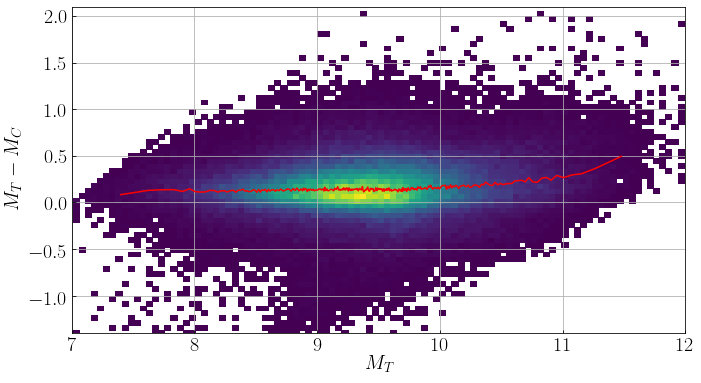

In [262]:
cat_cut = cat[np.logical_and(cat['CLASS_1']<10,abs(cat['ZPDF']-cat['Z_BEST_BC03'])<0.05*cat['Z_BEST_BC03'])] 

# cat_cut = cat[np.logical_and(cat['CLASS']<10,abs(cat['Z_BEST_BC03']-0.6)<0.3)] 
cat_cut = cat_cut[cat_cut['SSFR_BEST_1']>-11]

fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(11, 6))
x = np.array(cat_cut['MASS_MED_1'])
y = np.array(cat_cut['MASS_MED_1']-cat_cut['MASS_MED_2'])

y = y[np.logical_and(x>7,x<12)]
x = x[np.logical_and(x>7,x<12)]

x = x[np.logical_and(y>-3,y<3)]
y = y[np.logical_and(y>-3,y<3)]
x_list,y_median = median(x,y)

# # plot
plt.hist2d(x,y,bins=[100,100],cmin=0.1)
plt.plot(x_list,y_median,'r')

plt.xlim([7,12])
plt.ylim([-1.4,2.1])
plt.xlabel(r'$M_T$', fontsize=20)
plt.ylabel(r'$M_T-M_C$', fontsize=20)
plt.grid()
# plt.show(); plt.close()

### both-central catalogs (match the central catalogs, using two both-massive cats and isolation criteria)
save catalogs for massive centrals that satisfy both old (M>11.15, zcut) and new (M>11.35,zcut) selection criteria, and also pass the isolation criteria using corresponding selection criteria

In [601]:
cat_names = ['COSMOS_deep','ELAIS_deep', 'DEEP_deep','XMM-LSS_deep','SXDS_uddd']
for cat_name in cat_names:
    for z in [0.4,0.6,0.8]:
        print(cat_name,z)
        cat_old = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_11.15_'+str(z)+'_params_old.positions.fits')
        cat_new = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_11.35_'+str(z)+'_params_new.positions.fits')
        cat3 = Table(names=cat_old.colnames, dtype=[str(y[0]) for x, y in cat_old.dtype.fields.items()])
        cat_old_central = setdiff(cat_old,cat_new,keys='NUMBER')
        cat_new_central = setdiff(cat_new,cat_old,keys='NUMBER')

        for gal in cat_old:
            if gal['NUMBER'] in cat_new['NUMBER']:
                cat3.add_row(gal)

        cat3.write('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_'+str(z)+'_both_central.positions.fits',overwrite=True)
        cat_old_central.write('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_'+str(z)+'_old_central.positions.fits',overwrite=True)
        cat_new_central.write('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_'+str(z)+'_new_central.positions.fits',overwrite=True)
        print(len(cat3),len(cat_old_central),len(cat_new_central))
        

COSMOS_deep 0.4
67 8 6
COSMOS_deep 0.6
101 17 16
COSMOS_deep 0.8
121 29 37
ELAIS_deep 0.4
132 29 23
ELAIS_deep 0.6
122 22 29
ELAIS_deep 0.8
97 35 60
DEEP_deep 0.4
141 23 19
DEEP_deep 0.6
162 29 51
DEEP_deep 0.8
129 49 62
XMM-LSS_deep 0.4
99 18 13
XMM-LSS_deep 0.6
106 24 32
XMM-LSS_deep 0.8
115 40 38
SXDS_uddd 0.4
36 10 6
SXDS_uddd 0.6
53 9 7
SXDS_uddd 0.8
38 7 12


check properties of the centrals that satisfy both selection criteria

In [327]:
cat_combined = Table(names=cat_old.colnames, dtype=[str(y[0]) for x, y in cat_old.dtype.fields.items()])
for cat_name in cat_names:
    for z in [0.4,0.6,0.8]:
        cat = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_'+str(z)+'_both_central.positions.fits')
        cat_combined = vstack([cat_combined,cat])
        

Text(0.5, 0, 'MassNew - MassOld  (log)')

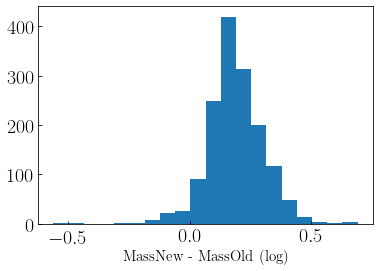

In [336]:
plt.hist(cat_combined['MASS_MED_new']-cat_combined['MASS_MED'],bins=20)
plt.xlabel('MassNew - MassOld  (log)',fontsize=15)

Text(0.5, 0, 'zNew - zOld  (log)')

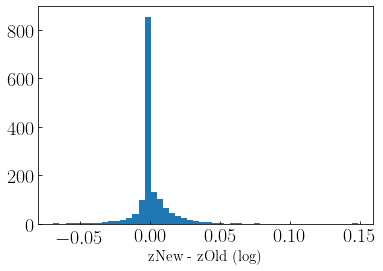

In [437]:
plt.hist(cat_combined['Z_BEST_BC03']-cat_combined['zKDEPeak'],bins=50)
plt.xlabel('zNew - zOld  (log)',fontsize=15)

### new/old-only-central catalogs (match the central catalogs, using two both-massive cats and isolation criteria)
save catalogs for massive centrals that only satisfy old (M>11.15, zcut) or new (M>11.35,zcut) selection criteria, and also pass the isolation criteria using corresponding selection criteria

In [351]:
cat_names = ['COSMOS_deep','ELAIS_deep', 'DEEP_deep','XMM-LSS_deep','SXDS_uddd']
selection = 'old'
cat_only_combined = Table(names=cat_old.colnames, dtype=[str(y[0]) for x, y in cat_old.dtype.fields.items()])
for z in [0.4,0.6,0.8]:
    for cat_name in cat_names:
        print(cat_name,z)
        cat_old_new = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_11.15_'+str(z)+'_massive_'+selection+'_params_old.positions.fits')
        cat_only_combined = vstack([cat_only_combined,cat_old_new])
    combine_name = 'CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+str(z)+'_massive_'+selection+'_central.positions.fits'
    cat_only_combined.write(combine_name,overwrite=True)
    print(combine_name)
            

COSMOS_deep 0.4
ELAIS_deep 0.4
DEEP_deep 0.4
XMM-LSS_deep 0.4
SXDS_uddd 0.4
CUT_deep_catalogs/massive_gal_matched_cat/isolated_0.4_massive_old_central.positions.fits
COSMOS_deep 0.6
ELAIS_deep 0.6
DEEP_deep 0.6
XMM-LSS_deep 0.6
SXDS_uddd 0.6
CUT_deep_catalogs/massive_gal_matched_cat/isolated_0.6_massive_old_central.positions.fits
COSMOS_deep 0.8
ELAIS_deep 0.8
DEEP_deep 0.8
XMM-LSS_deep 0.8
SXDS_uddd 0.8
CUT_deep_catalogs/massive_gal_matched_cat/isolated_0.8_massive_old_central.positions.fits


Text(0.5, 0, 'MassNew - MassOld  (log)')

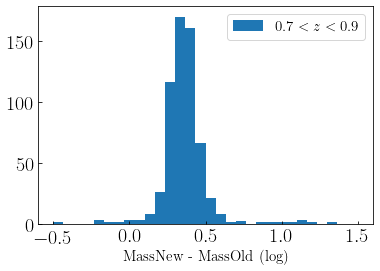

In [435]:
cat_only = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/isolated_0.8_massive_new_central.positions.fits')
plt.hist(cat_only['MASS_MED_new']-cat_only['MASS_MED'],range=(-0.5,1.5),bins=30,label=r'$0.7<z<0.9$')
plt.legend(fontsize=15)
plt.xlabel('MassNew - MassOld  (log)',fontsize=15)

Text(0.5, 0, 'zNew - zOld  (log)')

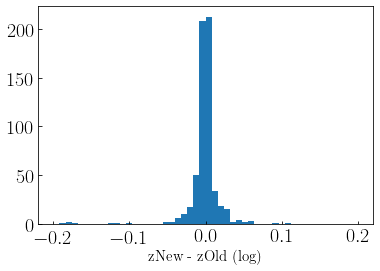

In [436]:
plt.hist(cat_only['Z_BEST_BC03']-cat_only['zKDEPeak'],bins=50,range=(-0.2,0.2))
plt.xlabel('zNew - zOld  (log)',fontsize=15)

### combine the satellite catalogs (old/new catalog directly)
combine satellite catalogs (one for each central) for each field and redshift bin

In [382]:
sat_path = 'CUT_deep_catalogs/total_sample_0321/COSMOS_deep_4.0/'
cat_stack = Table(names=cat_old.colnames, dtype=[str(y[0]) for x, y in cat_old.dtype.fields.items()])

filelist = glob.glob(sat_path+'/*.fits')

for filename in filelist:
    cat = Table.read(filename)
    cat_stack = vstack([cat_stack,cat])

print(len(cat_stack))

378
14780


Text(0.5, 0, 'zNew - zOld  (log)')

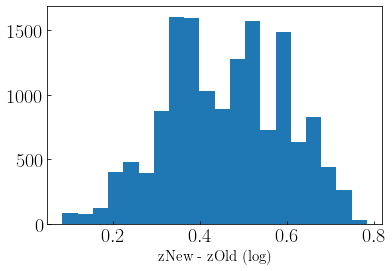

In [389]:
plt.hist(cat_stack['zKDEPeak'],bins=20)
plt.xlabel('zNew - zOld  (log)',fontsize=15)

Text(0.5, 0, 'MassNew - MassOld  (log)')

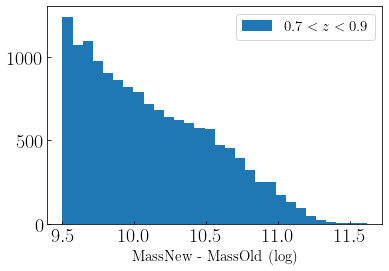

In [390]:
plt.hist(cat_stack['MASS_MED'],bins=30,label=r'$0.7<z<0.9$')
plt.legend(fontsize=15)
plt.xlabel('MassNew - MassOld  (log)',fontsize=15)

### combine the satellite catalogs (matched cat)
combine satellite catalogs (one for each central) for each field and redshift bin

To compare:
1. overlapping fraction
2. redshift difference
3. mass difference

In [541]:
# stack satellite catalogs
# selected by old params

cat_sat_stack_old_params = Table(names=cat_old.colnames, dtype=[str(y[0]) for x, y in cat_old.dtype.fields.items()])
for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep','SXDS_uddd']:
    sat_path = 'CUT_deep_catalogs/total_sample_matched_cat_massive_both-central_old_params/'+cat_name+'_4.0/'

    filelist = glob.glob(sat_path+'/*_sat.fits')
    for filename in filelist:
        cat = Table.read(filename)
        cat_sat_stack_old_params = vstack([cat_sat_stack_old_params, cat])

cat_sat_stack_old_params = unique(cat_sat_stack_old_params,keys='NUMBER')
print(len(filelist),len(cat_sat_stack_old_params))

36 21361


In [542]:
# stack satellite catalogs
# selected by new params

cat_sat_stack_new_params = Table(names=cat_old.colnames, dtype=[str(y[0]) for x, y in cat_old.dtype.fields.items()])
for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep','SXDS_uddd']:
    sat_path = 'CUT_deep_catalogs/total_sample_matched_cat_massive_both-central_new_params/'+cat_name+'_4.0/'

    filelist = glob.glob(sat_path+'/*_sat.fits')
    for filename in filelist:
        cat = Table.read(filename)
        cat_sat_stack_new_params = vstack([cat_sat_stack_new_params, cat])
        
cat_sat_stack_new_params = unique(cat_sat_stack_new_params,keys='NUMBER')
print(len(filelist),len(cat_sat_stack_new_params))

36 22276


overlapping fraction

In [584]:
cat_sat_stack_both = join(cat_sat_stack_old_params,cat_sat_stack_new_params,keys='NUMBER',join_type='inner')
cat_sat_stack_old_only = setdiff(cat_sat_stack_old_params,cat_sat_stack_new_params,keys='NUMBER')
cat_sat_stack_new_only = setdiff(cat_sat_stack_new_params,cat_sat_stack_old_params,keys='NUMBER')
print(len(cat_sat_stack_both))

19621


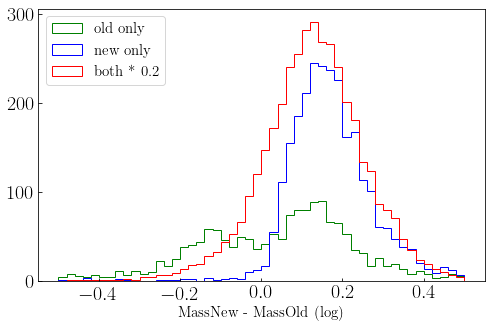

In [594]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 5))
plt.hist(cat_sat_stack_old_only['MASS_MED_new']-cat_sat_stack_old_only['MASS_MED'],
         bins=50,range=(-0.5,0.5),color='g',histtype='step',
        label='old only')

plt.hist(cat_sat_stack_new_only['MASS_MED_new']-cat_sat_stack_new_only['MASS_MED'],
         bins=50,range=(-0.5,0.5),color='b',histtype='step',label='new only')

plt.hist(cat_sat_stack_both['MASS_MED_new_1']-cat_sat_stack_both['MASS_MED_1'],
         bins=50,range=(-0.5,0.5),color='r',histtype='step',weights=np.ones(len(cat_sat_stack_both))*0.2,
        label='both * 0.2')

plt.xlabel('MassNew - MassOld  (log)',fontsize=15)
plt.legend(fontsize=15,loc='upper left')

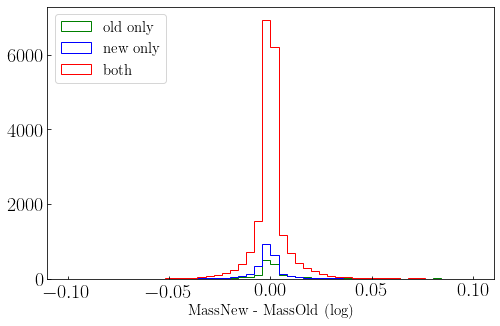

In [597]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 5))
plt.hist(cat_sat_stack_old_only['Z_BEST_BC03']-cat_sat_stack_old_only['zKDEPeak'],
         bins=50,range=(-0.1,0.1),color='g',histtype='step',
        label='old only')

plt.hist(cat_sat_stack_new_only['Z_BEST_BC03']-cat_sat_stack_new_only['zKDEPeak'],
         bins=50,range=(-0.1,0.1),color='b',histtype='step',label='new only')

plt.hist(cat_sat_stack_both['Z_BEST_BC03_1']-cat_sat_stack_both['zKDEPeak_1'],
         bins=50,range=(-0.1,0.1),color='r',histtype='step',
        label='both')

plt.xlabel('MassNew - MassOld  (log)',fontsize=15)
plt.legend(fontsize=15,loc='upper left')

mass difference

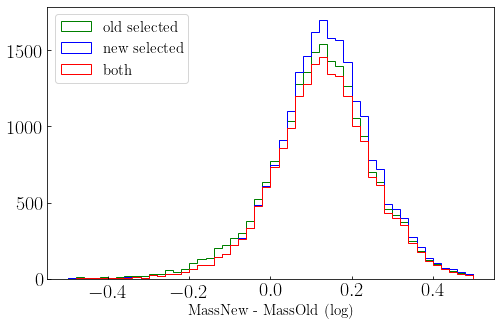

In [592]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 5))
plt.hist(cat_sat_stack_old_params['MASS_MED_new']-cat_sat_stack_old_params['MASS_MED'],
         bins=50,range=(-0.5,0.5),color='g',histtype='step',
        label='old selected')

plt.hist(cat_sat_stack_new_params['MASS_MED_new']-cat_sat_stack_new_params['MASS_MED'],
         bins=50,range=(-0.5,0.5),color='b',histtype='step',label='new selected')

plt.hist(cat_sat_stack_both['MASS_MED_new_1']-cat_sat_stack_both['MASS_MED_1'],
         bins=50,range=(-0.5,0.5),color='r',histtype='step',
        label='both')

plt.xlabel('MassNew - MassOld  (log)',fontsize=15)
plt.legend(fontsize=15,loc='upper left')

redshift difference

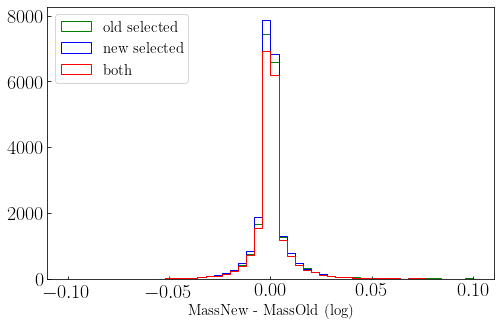

In [598]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 5))
plt.hist(cat_sat_stack_old_params['Z_BEST_BC03']-cat_sat_stack_old_params['zKDEPeak'],
         bins=50,range=(-0.1,0.1),color='g',histtype='step',
        label='old selected')

plt.hist(cat_sat_stack_new_params['Z_BEST_BC03']-cat_sat_stack_new_params['zKDEPeak'],
         bins=50,range=(-0.1,0.1),color='b',histtype='step',label='new selected')

plt.hist(cat_sat_stack_both['Z_BEST_BC03_1']-cat_sat_stack_both['zKDEPeak_1'],
         bins=50,range=(-0.1,0.1),color='r',histtype='step',
        label='both')

plt.xlabel('MassNew - MassOld  (log)',fontsize=15)
plt.legend(fontsize=15,loc='upper left')

look at individual satellite catalogs (per one central)

In [476]:
rand_n = 40
cat_name = 'DEEP_deep'

filelist_old = glob.glob('CUT_deep_catalogs/total_sample_matched_cat_massive_both-central_old_params/'+cat_name+'_4.0/*_sat.fits')
filename_old = filelist_old[rand_n]
cat1 = Table.read(filename_old)

filelist_new = glob.glob('CUT_deep_catalogs/total_sample_matched_cat_massive_both-central_new_params/'+cat_name+'_4.0/*_sat.fits')
filename_new = filelist_new[rand_n]
cat2 = Table.read(filename_new)

print(len(cat1),len(cat2))

36 45


In [485]:
overlap_count = 0
cat_sat_stack_both_params = Table(names=cat1.colnames, dtype=[str(y[0]) for x, y in cat1.dtype.fields.items()])
for gal in cat2:
    if gal['NUMBER'] in cat1['NUMBER']:
        overlap_count += 1
        cat_sat_stack_both_params.add_row(gal)

print(overlap_count)

34


In [486]:
print( cat_sat_stack_both_params['NUMBER','MASS_MED','MASS_MED_new','zKDEPeak','Z_BEST_BC03'])

    NUMBER         MASS_MED     MASS_MED_new       zKDEPeak      Z_BEST_BC03
------------- ----------------- ------------ ------------------- -----------
9707420002064           9.55077      9.59282 0.37435445362502506      0.3714
9707420002075           10.3711      10.5591  0.6755999987189835      0.6793
9707420003099           9.64688      9.51404  0.6252071901305659      0.7035
9707420003402 9.771239999999999      9.76508  0.7074354413124893      0.7398
9707420003338 9.570210000000001       9.6175  0.4320082240873151      0.4341
9707420002479           9.88632      9.89714  0.4811077081375533      0.4804
9707420005049           9.76484      9.91057  0.6847690887995311       0.679
9707420002132           10.3494      10.5404  0.4721621700951286      0.4771
9707420004887           11.0787      11.0815  0.6816995841962796      0.6891
9707420002841 9.597010000000001      9.71406 0.43544025338805836      0.4544
          ...               ...          ...                 ...         ...

In [465]:
print(cat1['NUMBER','MASS_MED'])

    NUMBER    MASS_MED
------------- --------
9708800004314  10.4102
9707100007187  10.0551
9464080005537  9.58863
9708800004989   9.6214
9708800002438  9.96572
9464080003111  9.58043
9707100006280  9.93031
9464080005218  10.0855
9708800005837  9.64747
9707000004195  10.3278
          ...      ...
9465880004714  10.8437
9464080002900  10.4805
9465880006436  10.3098
9707100007266  10.2907
9465880004347    11.27
9708800005221  10.3402
9464080003160  10.8639
9464080006355  11.0371
9708800006311  9.94458
9464080002449   10.636
9464180003868   10.249
Length = 46 rows
